**Post Test - Self-Organizing Maps**

*Self-organizing maps* (SOM), atau yang disebut juga dengan
topology-preserving maps, adalah sebuah algoritma klasterisasi (clustering)
sehingga termasuk pada algoritma unsupervised learning.

#Kode (Jangan diubah)
Fungsi *self-organizing maps*

In [6]:
import numpy as np

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min = np.argmin(d)
            centroids[min] += lrate * (x - centroids[min])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min = np.argmin(d)
        labels.append(min)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

#Soal

Gunakan dataset "Mall_Customers.csv" yang telah dilampirkan

Terdapat data Mall Segentation yang berisikan data CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100). Pada data tersebut, akan dilakukan klasterisasi menjadi 3 klaster dengan:
1. learning rate=0.1, b=0.2, dan max_epoc=3


### a) Load data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [7]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### b) Preprocess

In [8]:
data['Gender'] = data['Gender'].replace({'Female':0, 'Male': 1})
data['Gender'].unique()

data.head()

<ipython-input-8-a79475329cec>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Female':0, 'Male': 1})


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### c) Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

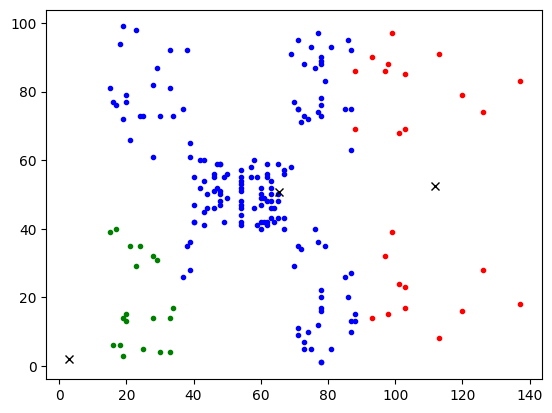

In [9]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data yang digunakan untuk klasterisasi adalah fitur Annual Income (k$)	Spending Score (1-100)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values # diisi praktikan
print('Data:\n', X)

centroids, labels = som(X, lrate= 0.1, b=0.2 , max_epoch=7 , n_cluster=3) # isi sesuai dengan perintah
print('centroid terbaru:\n',centroids)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)

Perbandingan Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

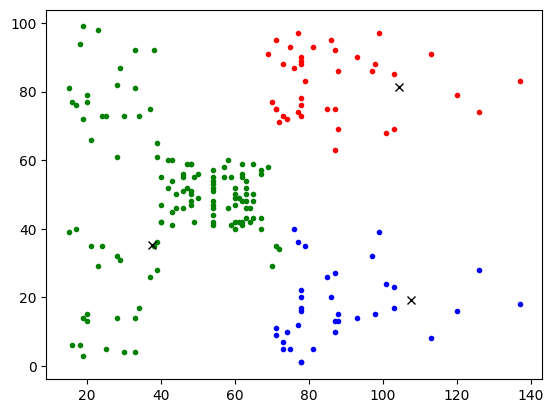

In [11]:
#hasil perbandingan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data yang digunakan untuk klasterisasi adalah fitur Annual Income (k$)	Spending Score (1-100)
X = data[['Annual Income (k$)', 'Spending Score (1-100)'] ].values # diisi praktikan
print('Data:\n', X)

centroids, labels = som(X, lrate=0.2 , b=0.05 , max_epoch=100 , n_cluster=3) #cari parameter untuk mendapatkan hasil klasterisasi yang lebih baik
print('centroid terbaru:\n',centroids)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)

 Kita tidak menggunakan akurasi untuk menilai kinerja clustering, melainkan silhouette score. Silhouette score adalah metrik yang digunakan untuk menghitung seberapa baik pengelompokan/clustering. Nilainya berkisar antara -1 hingga 1. dengan detail sebagai berikut.

-  1: cluster berjauhan satu sama lain dan dapat dibedakan dengan jelas.

-  0 : Berarti cluster bersifat indifferent, atau dapat dikatakan jarak antar cluster tidak signifikan.

-  -1: Berarti cluster dikelompokkan dengan cara yang salah.

<br>

**Pertanyaan**

1. Carilah learning rate, b, dan max epoch yang sesuai dan menghasilkan hasil clustering yang cukup baik!

2. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate, b, dan max epoch yang dimasukkan!

1. Dari yang saya coba, nilai learningrate=0.2 , b=0.05 , max_epoch=100
2. Learning rate memengaruhi kecepatan konvergensi dan stabilitas algoritma SOM. Tingkat pembelajaran yang rendah memungkinkan proses konvergensi yang lebih lambat namun akurat, sedangkan tingkat pembelajaran yang tinggi dapat mempercepat konvergensi tetapi berisiko kehilangan detail penting, mengurangi akurasi. Parameter nilai bias berperan dalam mengatur pengaruh tetangga terhadap neuron pemenang, dengan radius besar memfasilitasi eksplorasi yang lebih luas, sedangkan radius kecil mendukung eksplorasi yang lebih fokus. Selain itu, Max Epochs menentukan durasi training; semakin tinggi nilainya, semakin lama proses pelatihan berlangsung. Dari perubahan parameter yang saya lakukan, hasil klasterisasi centroid menjadi lebih optimal, dengan peningkatan nilai silhouette score yang menunjukkan kualitas klaster yang lebih baik.